In [11]:
from radmc3dPy.image import *
from radmc3dPy.analyze import *
from radmc3dPy.natconst import *

import os

In [12]:
#makeImage(npix=200,incl=60.,phi=30.,wav=1.3e3,sizeau=200)
#makeImage(npix=100,incl=0.,phi=0.,wav=344) 

makeImage(npix=100,incl=0.,phi=0.,wav=1300,sizeau=350,setthreads=4)   # This calls radmc3d
os.system('cp image.out image_iso.out')


Executing RADMC-3D Command:
radmc3d image npix 100 incl 0.0 sizeau 350 lambda 1300 phi 0.0 pointau 0.0  0.0  0.0 fluxcons setthreads 4


1

Reading image.out


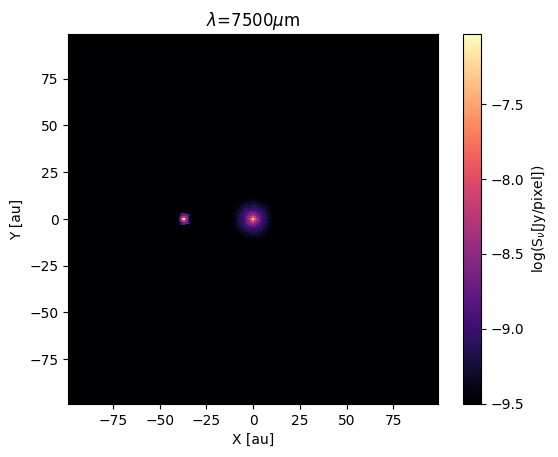

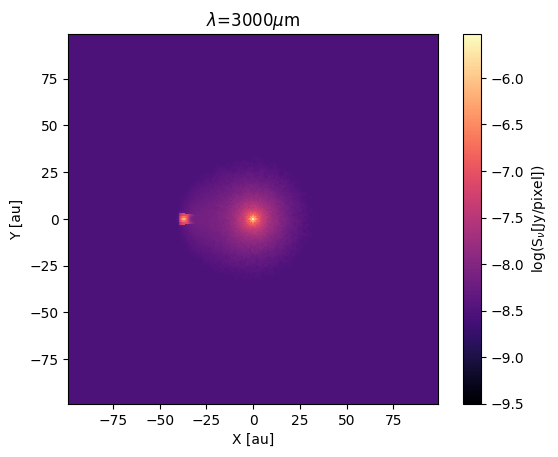

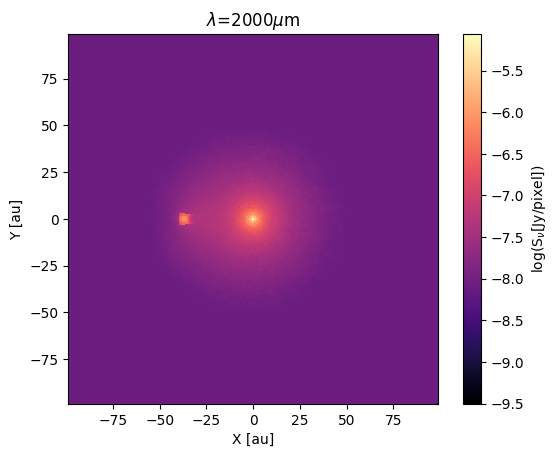

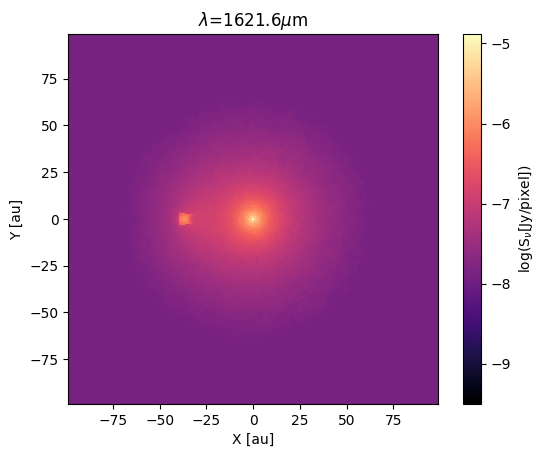

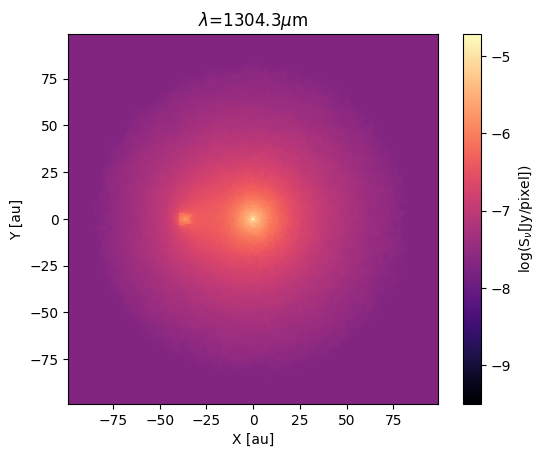

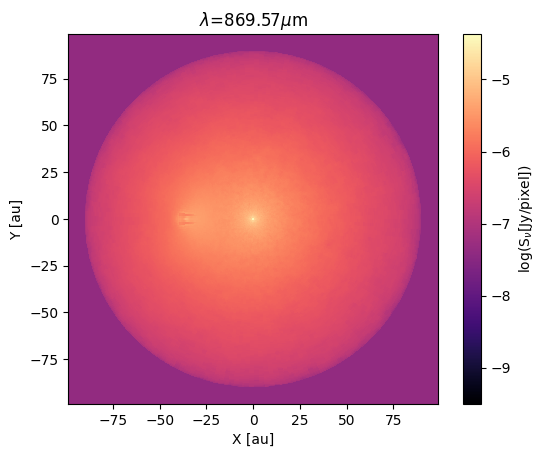

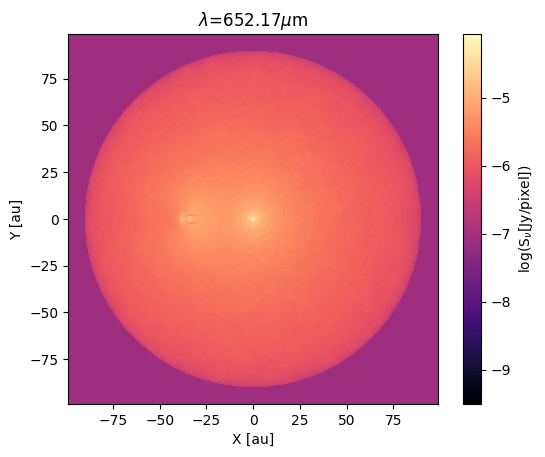

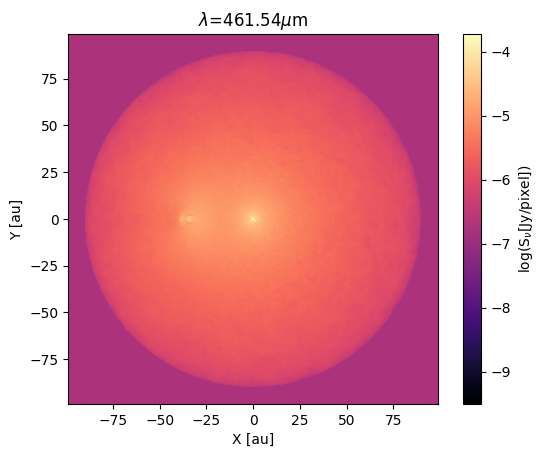

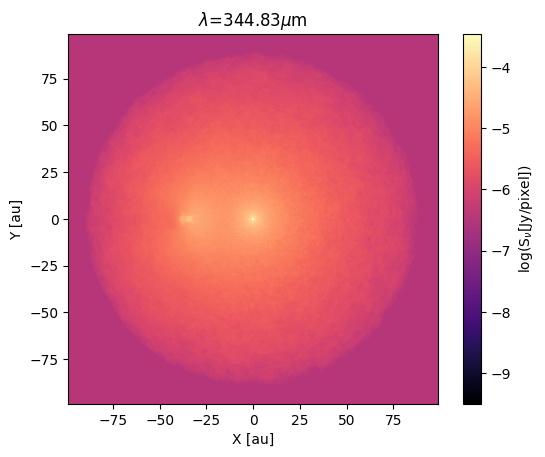

<Figure size 640x480 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt

im_mm = readImage()
# Create a figure with subplots

# Loop through ifreq from 0 to 8
for i in range(9):
    plotImage(im_mm, au=True, ifreq=i, log=True, maxlog=3, bunit='jy/pixel', saturate = 1, dpc=100, cmap='magma',vmin = -9.5)

# prob need not use plotImage, but plot image.out directly and show which band is which
# Adjust layout
plt.tight_layout()
plt.show()

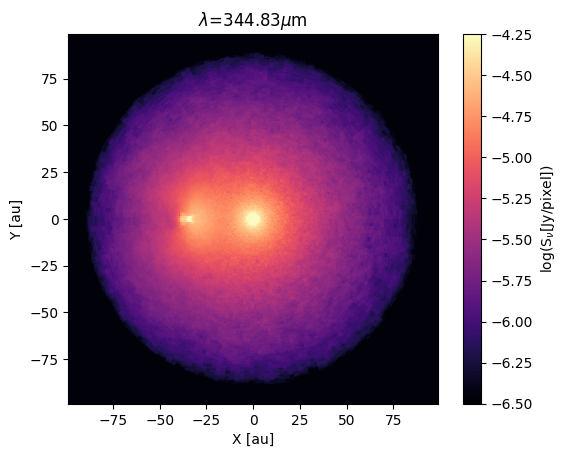

{'implot': <matplotlib.image.AxesImage at 0x1ec92e120c0>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x1ec92e12930>}

In [110]:

# Band1
plotImage(im_mm, au=True, ifreq=8, log=True, maxlog=3, bunit='jy/pixel', saturate = 1, dpc=100, cmap='magma', vmax = -4.25 ,vmin = -6.5)

Reading image.out


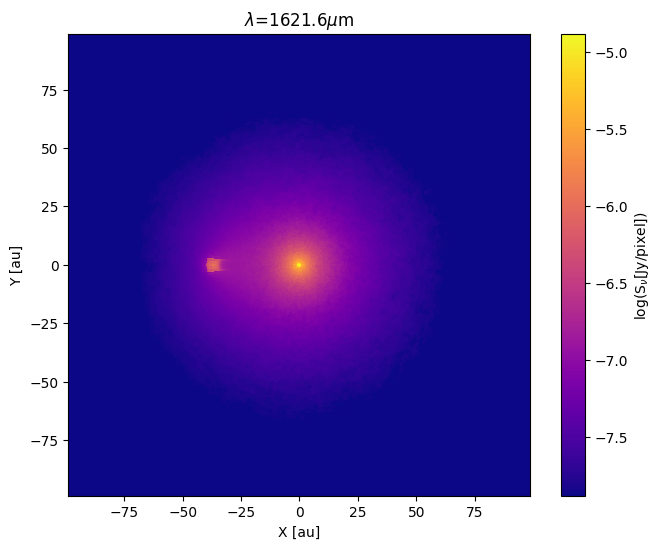

In [15]:
#check the wavelength

import matplotlib.pyplot as plt
from radmc3dPy.image import readImage, plotImage

# Load the image using radmc3dPy
im_mm = readImage()

# Create a figure
plt.figure(figsize=(8, 6))

# Plot the image for ifreq=3
plotImage(im_mm, au=True, ifreq=3, log=True, maxlog=3, bunit='jy/pixel', dpc=100, cmap='plasma')

# Show the plot
plt.show()

In [19]:
im_mm.writeFits('CPD_PPD_PDS70_1620.50.fits', dpc=113., coord='14h08m10s -41d23m53s', ifreq=3)

In [20]:
im_mm.writeFits('CPD_PPD_PDS70_7494.81.fits', dpc=113., coord='14h08m10s -41d23m53s', ifreq=0)
im_mm.writeFits('CPD_PPD_PDS70_2997.92.fits', dpc=113., coord='14h08m10s -41d23m53s', ifreq=1)
im_mm.writeFits('CPD_PPD_PDS70_1998.62.fits', dpc=113., coord='14h08m10s -41d23m53s', ifreq=2)
im_mm.writeFits('CPD_PPD_PDS70_1304.45.fits', dpc=113., coord='14h08m10s -41d23m53s', ifreq=4)
im_mm.writeFits('CPD_PPD_PDS70_868.96.fits', dpc=113., coord='14h08m10s -41d23m53s', ifreq=5)
im_mm.writeFits('CPD_PPD_PDS70_651.72.fits', dpc=113., coord='14h08m10s -41d23m53s', ifreq=6)
im_mm.writeFits('CPD_PPD_PDS70_461.22.fits', dpc=113., coord='14h08m10s -41d23m53s', ifreq=7)
im_mm.writeFits('CPD_PPD_PDS70_344.59.fits', dpc=113., coord='14h08m10s -41d23m53s', ifreq=8)


#Wavelength (micron)": [7494.81, 2997.92,1998.62, 1620.50,1304.45, 868.96, 651.72, 461.22, 344.59]

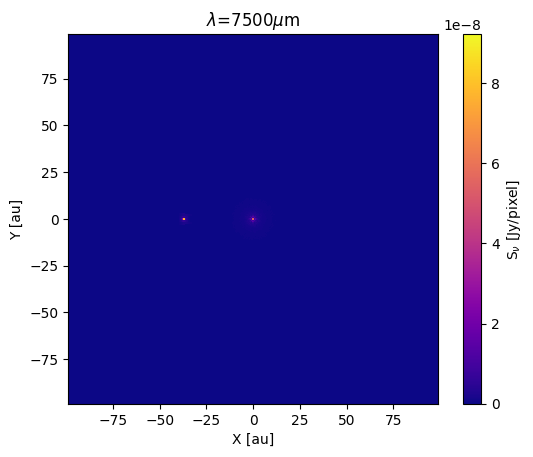

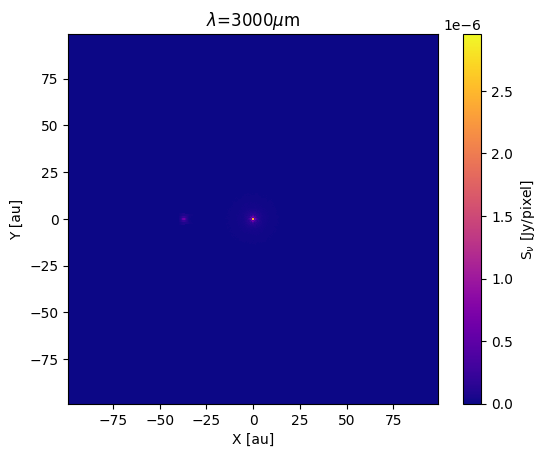

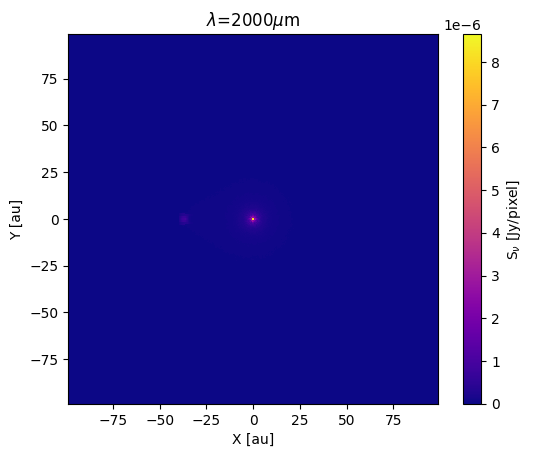

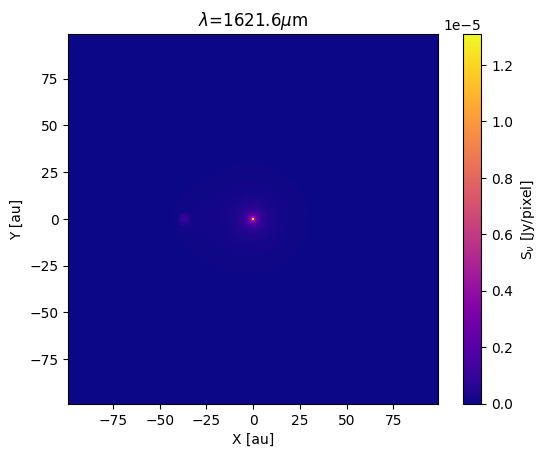

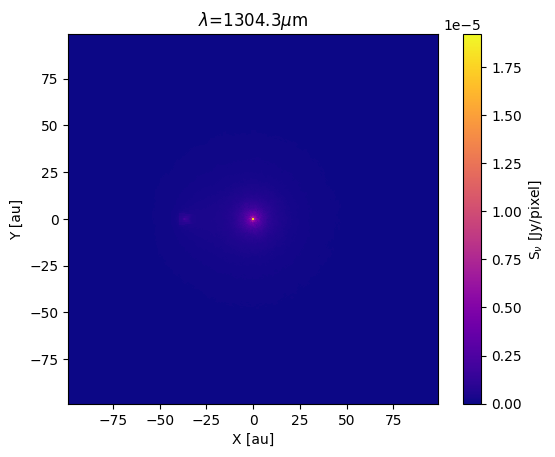

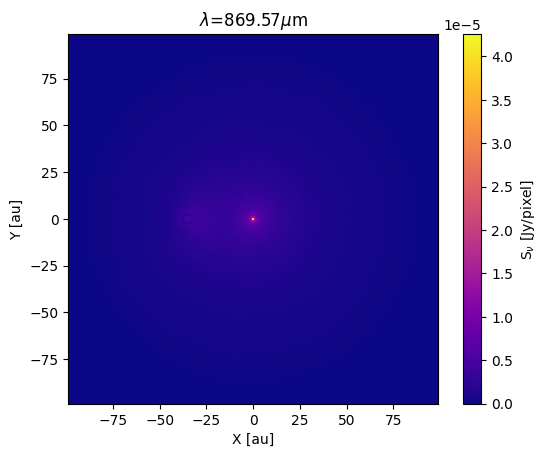

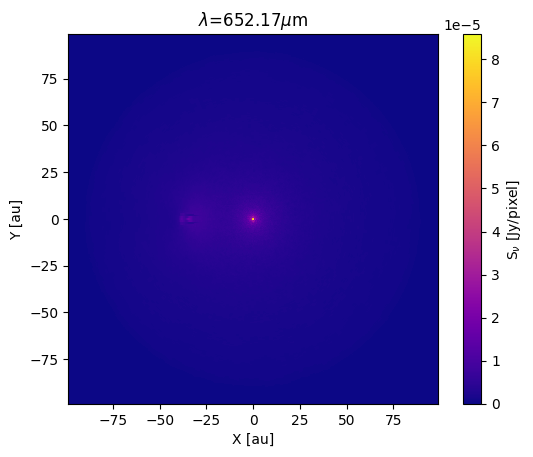

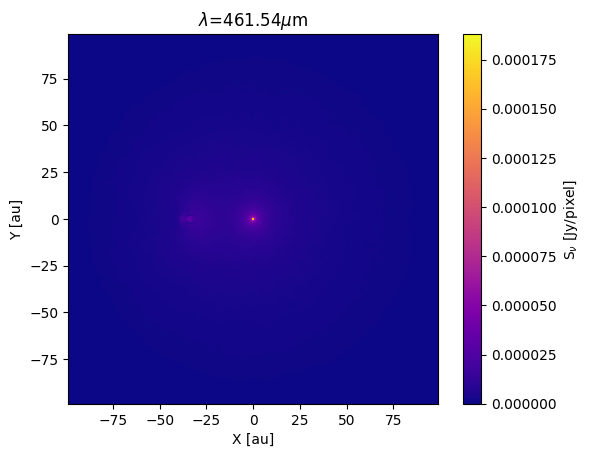

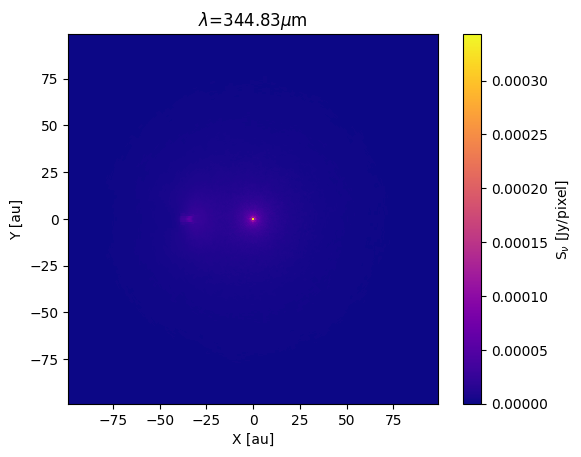

<Figure size 640x480 with 0 Axes>

In [24]:
# Not in log

# Loop through ifreq from 0 to 8
for i in range(9):
    plotImage(im_mm, au=True, ifreq=i, bunit='jy/pixel', dpc=100, saturate = 1,cmap='plasma')
    #cbar = plt.colorbar(implot)
    #cbar.set_label(cb_label)



# prob need not use plotImage, but plot image.out directly and show which band is which
# Adjust layout
plt.tight_layout()
plt.show()

<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:23: SyntaxWarning: invalid escape sequence '\;'
<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:23: SyntaxWarning: invalid escape sequence '\;'
C:\Users\LHEM\AppData\Local\Temp\ipykernel_4036\480743291.py:22: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda\; [\mu \mathrm{m}$]')
C:\Users\LHEM\AppData\Local\Temp\ipykernel_4036\480743291.py:23: SyntaxWarning: invalid escape sequence '\;'
  plt.ylabel('$\\nu F_\\nu \; [\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1}]$')


Text(0, 0.5, '$\\nu F_\\nu \\; [\\mathrm{erg}\\,\\mathrm{cm}^{-2}\\,\\mathrm{s}^{-1}]$')

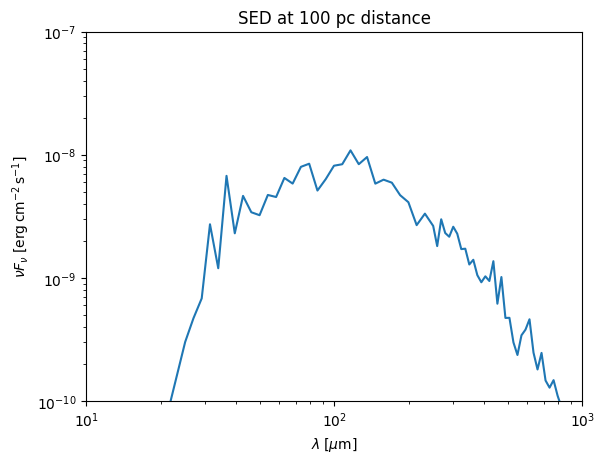

In [22]:
# Spectrum： radiation intensity vs wavelength
# SED: energy outpyt vs wavelength , can identify the components 

# Plot the spectrum of the CPD


# Make and plot the SED as seen at 1 pc distance
#
s     = readSpectrum()
lam   = s[:,0]  # Wavelength in micron
nu    = 1e4*cc/lam  # so that nu is in Hz
fnu   = s[:,1] # F_nu in ergs/cm^2/s/Hz
nufnu = nu*fnu  #y axis values in ergs/cm^2/s
plt.figure()
plt.plot(lam,nufnu)
#plt.xlim([100,1000])
plt.title('SED at 100 pc distance')
plt.xscale('log')
plt.yscale('log')
plt.axis([1e1, 1e3, 1e-10, 1e-7])

plt.xlabel('$\lambda\; [\mu \mathrm{m}$]')
plt.ylabel('$\\nu F_\\nu \; [\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1}]$')



In [23]:
print('The emission is stronger at high frequency end, and the optical depth is also higher in high-frequency end.')

The emission is stronger at high frequency end, and the optical depth is also higher in high-frequency end.


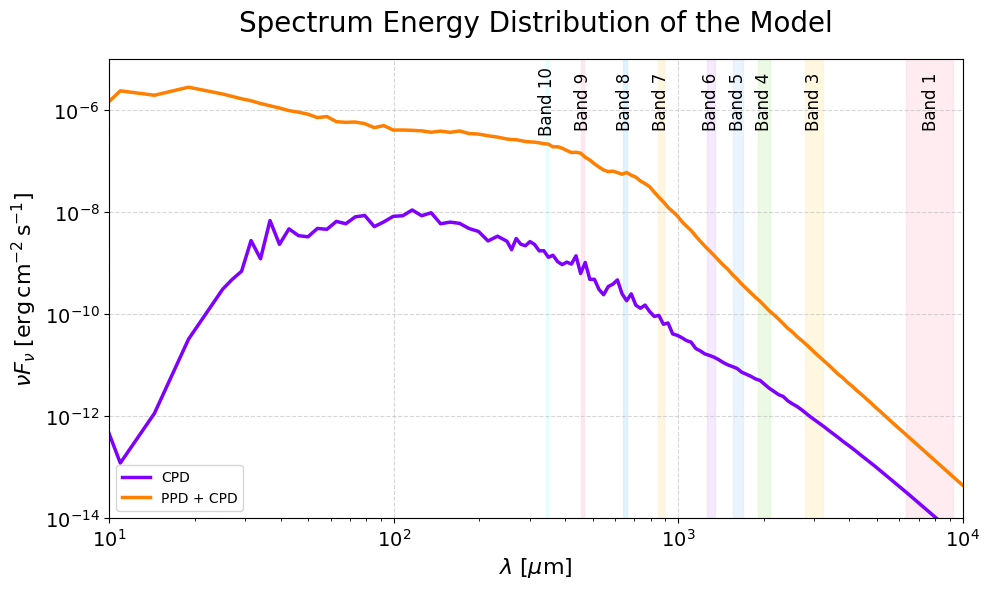

In [139]:
import pandas as pd


# Constants
cc = 2.99792458e10  # speed of light in cm/s

# Read data
s = pd.read_csv("CPD_SED.csv")  # or "spectrum.tsv", sep="\t" if it's TSV
ps = pd.read_csv("PPD_SED.csv")  # or "spectrum.tsv", sep="\t" if it's TSV

lam = s.iloc[:, 0].values       # Wavelength in micron
lam_p = ps.iloc[:, 0].values       # Wavelength in micron
fnu = s.iloc[:, 1].values       # Flux density in erg/cm^2/s/Hz
fnu_p   = ps.iloc[:, 1].values       # Flux density in erg/cm^2/s/Hz


nu = 1e4 * cc / lam             # Convert microns to Hz
nufnu = nu * fnu                # erg/cm^2/s
nufnu_p = nu * fnu_p                # erg/cm^2/s

# Plot
plt.figure(figsize=(10, 6))
plt.plot(lam, nufnu, linewidth=2.5, color = '#7F00FF', label='CPD')
plt.plot(lam_p, nufnu_p, linewidth=2.5, color = '#FF7F00', label='PPD + CPD')

plt.title('Spectrum Energy Distribution of the Model', fontsize=20, pad = 20)
plt.xscale('log')
plt.yscale('log')
plt.axis([1e1, 1e4, 1e-14, 1e-5])

plt.xlabel(r'$\lambda\; [\mu \mathrm{m}]$', fontsize=16)
plt.ylabel(r'$\nu F_\nu \; [\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1}]$', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=12)





# Add notations of ALMA Band frequencies 
Wavelength_mum =  [7494.81, 2997.92,1998.62, 1620.50,1304.45, 868.96, 651.72, 461.22, 344.59]
Band= ['Band 1', 'Band 3', 'Band 4', 'Band 5', 'Band 6', 'Band 7', 'Band 8', 'Band 9', 'Band 10']

# Add pastel rainbow colors (just a sample of nice colors)
colors = ['#ffd1dc', '#ffecb3', '#d0f0c0', '#cce5ff', '#e6ccff', '#fceabb', '#b3e6ff', '#ffcce0', '#ccffff']

# Plot shaded bands
for i, wl_center in enumerate(Wavelength_mum):
    # Convert wavelength (micron) to frequency (Hz)
    freq_center = 1e4 * cc / wl_center  # Convert microns to Hz

    # Apply ±7.5 GHz band width
    freq_min = freq_center - 7.5e9
    freq_max = freq_center + 7.5e9

    # Convert frequency back to wavelength in microns
    wl_min = 1e4 * cc / freq_max
    wl_max = 1e4 * cc / freq_min

    # Plot shaded region
    plt.axvspan(wl_min, wl_max, color=colors[i], alpha=0.4)

    # Annotate band name
    text_x = (wl_min + wl_max) / 2
    text_y = 1.5e-6
    plt.text(text_x, text_y, Band[i], fontsize=12, ha='center', va='center', rotation=90)



plt.legend()  
plt.grid(True, ls='--', alpha=0.5)
plt.tight_layout()
plt.show()